# Background
Imagine a dataset with n training examples, $ \mathcal{D} = \{ (\mathbf{x_1}, y_1), (\mathbf{x_2}, y_2) ... (\mathbf{x_N}, y_N) \}$, where $\mathbf{x_n}$ is an input vector and $y$ is a binary variable (0 or 1)

**Logistic regression** assumes a probabilistic relationship between $\mathbf{x}$ and $y$. As the name suggests, the probability function is logistic:
\begin{align*}
P(y=1|\mathbf{x}, \beta) &= \sigma (\mathbf{\beta}^T \mathbf{x}) \\
P(y=0|\mathbf{x}, \beta) &= 1 - \sigma (\mathbf{\beta}^T \mathbf{x}) = \sigma (-\mathbf{\beta}^T \mathbf{x})
\end{align*}
where $\sigma (\mathbf{\beta}^T \mathbf{x})= \frac{1}{1 + \exp(-\mathbf{\beta}^T \mathbf{x})}$

Statistical theory explains that the parameters of the logistic model $\beta$ can be inferred by **maximizing the likelihood** of the parameters $\mathcal{L}(\beta)$ given the data $\mathcal{D}$

$$\mathcal{L}(\beta) = P(\mathcal{D}|\beta) = \prod_{n=1}^{N} P(y_n|\beta, \mathbf{x_n}) = \prod_{n=1}^{N} y_n\sigma (\mathbf{\beta}^T \mathbf{x}) + (1-y_n)  \sigma (-\mathbf{\beta}^T \mathbf{x})$$
$$ \log \mathcal{L}(\beta) = \sum_{n=1}^{N} y_n\log \left(\sigma (\mathbf{\beta}^T \mathbf{x}) \right) + (1-y_n) \log \left(\sigma (-\mathbf{\beta}^T \mathbf{x}) \right)$$
The maximum $\widehat{\beta} = \arg\!\max_{\beta} \mathcal{L}(\beta)$ can be found either by performing **gradient ascend** on $\mathcal{L}(\beta)$ or by **newton raphson** on $\frac{d}{d\mathbf{\beta}} \mathcal{L}(\beta) = 0$

# Task 1: Gradients of parameters in logistic regression
Answer:
$$\frac{d}{d\beta_i} \log\mathcal{L}(\beta) = \sum_{n=1}^{N} x^{(n)}_i \left[y^{(n)} - \sigma (\mathbf{\beta}^T \mathbf{x}) \right]$$
where $i$ indexes the component of the parameter vector $\mathbf{\beta}$

# Task 2: Gradient Ascend Pseudo-code
High level math:
$$ \mathbf{\beta}(t+1) = \mathbf{\beta}(t) + \eta \frac{d}{d\mathbf{\beta}} \mathcal{L}(\beta)$$
where $\eta$ is the learning rate.

Max-iteration pseudo code:
maxiter = 1000
for i in range(maxiter)

# Task 3: Visualise data

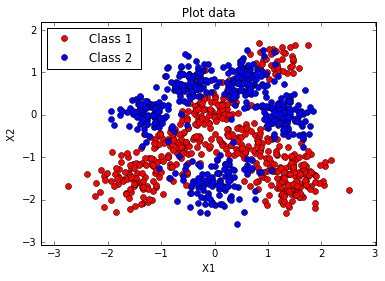

In [1]:
from appendix import *
X = np.loadtxt ('X.txt') # 1000 x 2
y = np.loadtxt ('y.txt') # 1000 x 1

plot_data(X, y)

Comments
- The two classes are not linearly separable. There is also no clear line which separates the red and blue regions. 
- But at least the blue and red regions are not significantly overlapping. Some nonlinear classifier can separate the two classes

# Task 4: Split Data
multiple ways to split data

In [2]:
test_ratio = 0.1
N = np.size(y)
indices = np.random.permutation(N)
idb  = int(test_ratio * N)
X_test = X[indices[:idb], : ]
y_test = y[indices[:idb]]

X_train = X[indices[idb:], : ]
y_train = y[indices[idb:]]

# Task 5: Training

In [3]:
def add_ones_column(X):
    if X.ndim ==2:
        N = np.shape(X)[0]
    elif X.ndim == 1:
        N = 1
    else:
        raise ValueError
    z = np.ones((N, 1))
    return np.append(z,X, axis=1)


def logistic(X, beta):
    X = add_ones_column(X)
    return 1./(1 + np.exp(- np.sum(X * beta, axis=1))) # make suitable for single row

def likelihood(X,y, beta):
    prob_class1 = logistic(X,beta)
    prob_class1 = prob_class1 * y
    prob_class2 = 1 - prob_class1
    prob_class2 = prob_class2 * (np.logical_not(y))

    probs = prob_class1 + prob_class2
    return probs # likelihood of every data point

def log_likelihood_score(X,y, beta):
    likelihoods = np.log(likelihood(X,y,beta))
    N = np.shape(likelihoods)[0]
    return np.sum(likelihoods) / N # average log-likelihood per datapoint

def gradients(X,y, beta):
    factor = (y - logistic(X, beta))
    X = add_ones_column(X)
    grad = np.sum((X.T * factor).T , axis=0)
    N = np.shape(X)[0]
    return grad / N

def gradient_ascent(X,y, beta, length = 10000, learning_rate = 0.1):
    score = np.zeros(length)
    change = np.zeros(length)
    for i in range(length):
        grad = gradients(X, y, beta)
        beta = beta + learning_rate * grad
        score[i] = log_likelihood_score(X,y,beta)
        change[i] = np.linalg.norm(grad)
    return beta, score, change

def newton_raphson(X,y, beta, length = 100):
    X1 = add_ones_column(X)
    score = np.zeros(length)
    change = np.zeros(length)
    for i in range(length):
        top = logistic(X, beta) - y
        top = np.sum((X1.T * top).T, axis=0)

        bottom = logistic(X, beta) * logistic(X,-beta)
        bottom = np.sum(((X1*X1).T * bottom).T, axis=0)

        beta = beta - top / bottom
        score[i] = log_likelihood_score(X,y,beta)
        change[i] = np.linalg.norm(top / bottom)
    return beta, score, change

In [4]:
beta_train, scores_train, changes_train = newton_raphson(X_train,y_train, np.array([ 0,0,0]))
beta_train

array([ 0.3082156 , -0.12055186,  0.8135864 ])

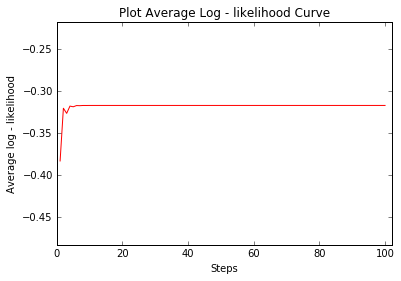

In [5]:
plot_ll(scores_train)

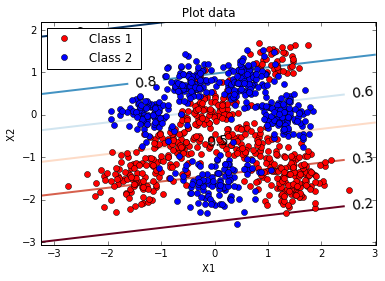

In [6]:
def predict(X):
    return logistic(X, beta_train)
plot_predictive_distribution(X, y, predict)

# Task 6: Results

## Log-likelihoods

In [7]:
import pandas as pd

# Compute log likelihood
score_test = log_likelihood_score(X_test,y_test, beta_train)
score_train = log_likelihood_score(X_train,y_train, beta_train)
s1 = pd.Series([score_train, score_test], index=['training score', 'test score'])

# Print
s1

training score   -0.316954
test score       -0.325622
dtype: float64

## Confusion matrix

In [8]:
y_predict = logistic(X_test, beta_train)

def confusion_matrix(predict, truth):
    true_negatives = np.sum(np.logical_and(np.logical_not(predict), np.logical_not(truth)))
    false_positives = np.sum(np.logical_and(predict, np.logical_not(truth)))
    false_negatives = np.sum(np.logical_and(np.logical_not(predict), truth))
    true_positives = np.sum(np.logical_and(predict, truth))
    d = {'predict = 0' : pd.Series([true_negatives, false_negatives], index=['y = 0', 'y = 1']), 
         'predict = 1' : pd.Series([false_positives, true_positives], index=['y = 0', 'y = 1'])}
    df = pd.DataFrame(d)
    return df

In [9]:
confusion_matrix(y_predict > 0.5, y_test)

,predict = 0,predict = 1
y = 0,31,15
y = 1,19,35


# Task 7: Receiver Operator Characteristic

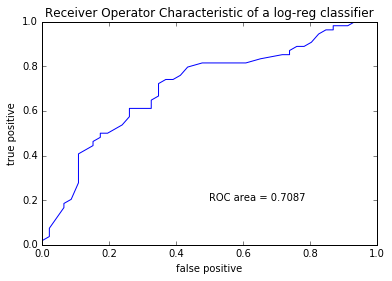

In [10]:
y_predict = logistic(X_test, beta_train)

def ROC(predict, truth, N=101):
    taus = np.linspace(0,1,N)
    false_pos_rate = np.zeros(N)
    true_pos_rate = np.zeros(N)

    for i in range(N):
        tau = taus[i]
        y_p = predict > tau
        false_pos_rate[i] = np.sum(np.logical_and(y_p, np.logical_not(truth))) / np.sum(np.logical_not(truth))
        true_pos_rate[i] = np.sum(np.logical_and(y_p, truth)) / np.sum(truth)
    return false_pos_rate, true_pos_rate

def plot_ROC(false_pos_rate, true_pos_rate):
    ax = plt.figure()
    plt.plot(false_pos_rate, true_pos_rate)
    plt.xlabel('false positive')
    plt.ylabel('true positive')
    plt.title('Receiver Operator Characteristic of a log-reg classifier')
    area = np.trapz(true_pos_rate[::-1], false_pos_rate[::-1])
    plt.text(0.5,0.2,'ROC area = ' + '{:01.4f}'.format(area))
    plt.show()

false_pos_rate, true_pos_rate = ROC(y_predict, y_test)    
plot_ROC(false_pos_rate, true_pos_rate)

## Comments
This classifier does not perform well.

# Task 8: Radial Basis Functions for logistic regression

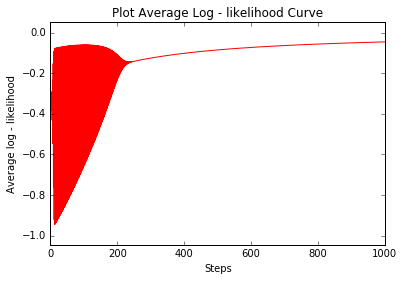

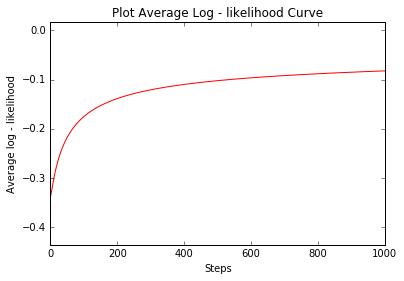

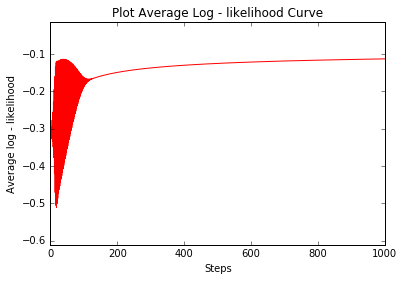

In [11]:
# hyperparameters
ll = [0.01,0.1,1]
eta = [10,1,0.1]

# Initialise Storage Variables
rbfbeta_train = []
rbfscore_train = []
rbfchange_train = []

rbfX_train = []
rbfX_test = []

# Transform input vector
for i in range(3):
    rbfX_train.append(expand_inputs(ll[i], X_train, X_train))
    rbfX_test.append(expand_inputs(ll[i], X_test, X_train))
    
# Train
for i in range(3):
    beta, score, change = \
        gradient_ascent(rbfX_train[i],y_train, np.zeros(len(y_train) + 1), length=1000, learning_rate = eta[i])
    
    rbfbeta_train.append(beta)
    rbfscore_train.append(score)
    rbfchange_train.append(change)
    
# Plot
for i in range(3):
    plot_ll(rbfscore_train[i])

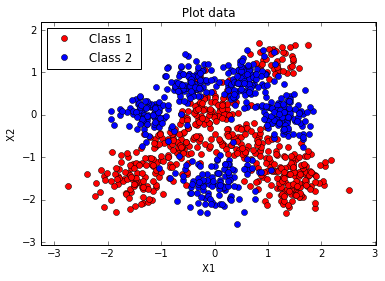

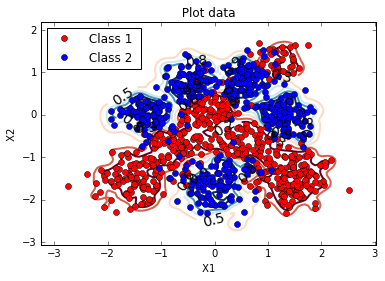

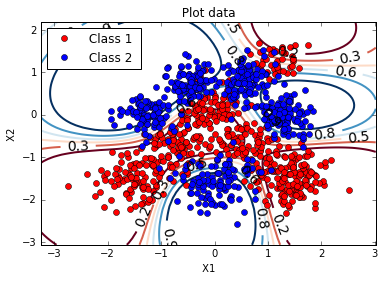

In [26]:
def predict_rbf0(X):
    rbfX = expand_inputs(ll[0], X, X_train)
    return logistic(rbfX, rbfbeta_train[0])
def predict_rbf1(X):
    rbfX = expand_inputs(ll[1], X, X_train)
    return logistic(rbfX, rbfbeta_train[1])
def predict_rbf2(X):
    rbfX = expand_inputs(ll[2], X, X_train)
    return logistic(rbfX, rbfbeta_train[2])

plot_predictive_distribution(X, y, predict_rbf0)
plot_predictive_distribution(X, y, predict_rbf1)
plot_predictive_distribution(X, y, predict_rbf2)

## Results

### Log likelihood

In [13]:
resultscores = {'simple' : s1} 
for i in range(3):
    # compute log - likelihood
    rbfscore_test = log_likelihood_score(rbfX_test[i],y_test, rbfbeta_train[i])
    rbfscore_train = log_likelihood_score(rbfX_train[i],y_train, rbfbeta_train[i])
    s = pd.Series([rbfscore_train, rbfscore_test], index=['training score', 'test score'])
    # save
    resultscores['RBF: l=' + str(ll[i])] =  s
    
# print
ff = pd.DataFrame(resultscores)
ff

,RBF: l=0.01,RBF: l=0.1,RBF: l=1,simple
training score,-0.045624,-0.082277,-0.112788,-0.316954
test score,-0.379917,-0.165966,-0.126554,-0.325622


### Confusion Matrix

In [14]:
# Evaluate models on test set
rbfy_predicts = []
for i in range(3):
    rbfy_predicts.append(logistic(rbfX_test[i], rbfbeta_train[i]))
    
# Print Confusion Matrix
for i in range(3):
    print('==Confusion matrix for l = ' + str(ll[i]) + '==')
    cm = confusion_matrix(rbfy_predicts[i]> 0.5, y_test)
    print(cm)
    print('\n')

==Confusion matrix for l = 0.01==
       predict = 0  predict = 1
y = 0           43            3
y = 1           43           11


==Confusion matrix for l = 0.1==
       predict = 0  predict = 1
y = 0           38            8
y = 1            5           49


==Confusion matrix for l = 1==
       predict = 0  predict = 1
y = 0           36           10
y = 1            4           50




### Receiver Operator Characteristics

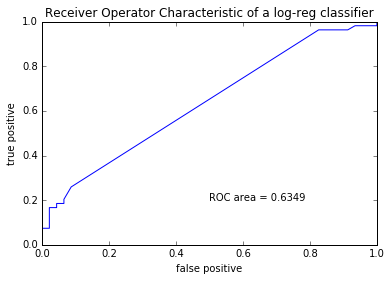

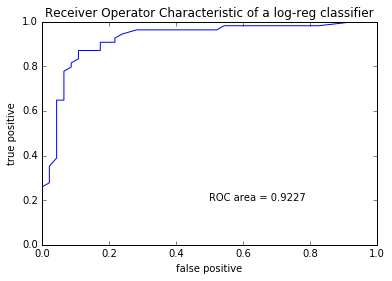

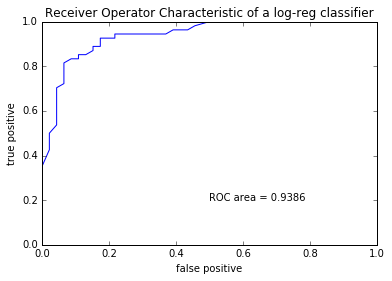

In [15]:
for i in range(3):
    rbffalse_pos_rate, rbftrue_pos_rate = ROC(rbfy_predicts[i], y_test)
    plot_ROC(rbffalse_pos_rate, rbftrue_pos_rate)

# Task 9: Adding Gaussian Priors

In [16]:
def gradient_ascent2(X,y, beta, length = 10000, learning_rate = 0.1):
    score = np.zeros(length)
    change = np.zeros(length)
    N = np.shape(X)[0]
    for i in range(length):
        grad = gradients(X, y, beta)
        grad = grad - beta / N # include effect of prior
        beta = beta + learning_rate * grad
        score[i] = log_likelihood_score(X,y,beta)
        change[i] = np.linalg.norm(grad)
    return beta, score, change

# hyperparameters
ll = [0.01,0.1,1]
eta = [5,1,0.1]

# Initialise Storage Variables
maprbfbeta_train = []
maprbfscore_train = []
maprbfchange_train = []

# Train
for i in range(3):
    beta, score, change = \
        gradient_ascent2(rbfX_train[i],y_train, np.zeros(len(y_train) + 1), length=500, learning_rate = eta[i])
    
    maprbfbeta_train.append(beta)
    maprbfscore_train.append(score)
    maprbfchange_train.append(change)

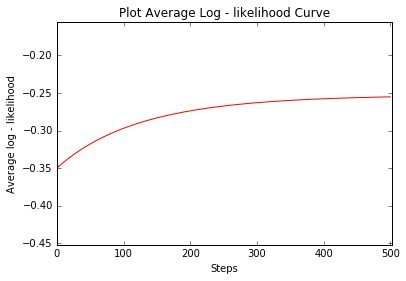

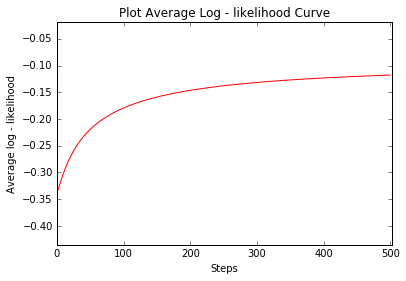

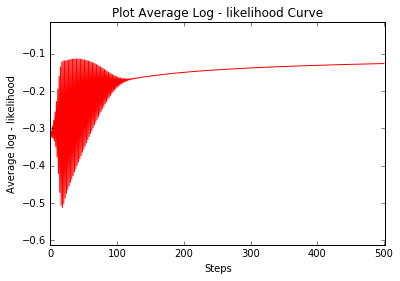

In [17]:
# Plot
for i in range(3):
    plot_ll(maprbfscore_train[i])

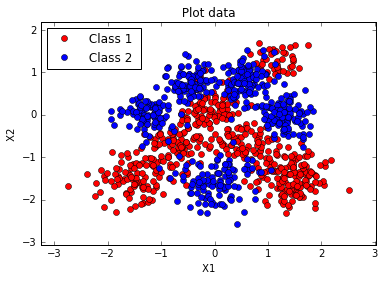

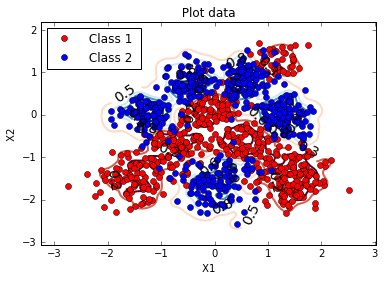

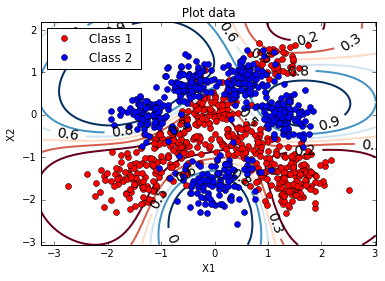

In [25]:
def predict_rbfmap0(X):
    rbfX = expand_inputs(ll[0], X, X_train)
    return logistic(rbfX, maprbfbeta_train[0])
def predict_rbfmap1(X):
    rbfX = expand_inputs(ll[1], X, X_train)
    return logistic(rbfX, maprbfbeta_train[1])
def predict_rbfmap2(X):
    rbfX = expand_inputs(ll[2], X, X_train)
    return logistic(rbfX, maprbfbeta_train[2])
plot_predictive_distribution(X, y, predict_rbfmap0)
plot_predictive_distribution(X, y, predict_rbfmap1)
plot_predictive_distribution(X, y, predict_rbfmap2)

In [27]:
mapresultscores = {'simple' : s1} 
for i in range(3):
    # compute log - likelihood
    maprbfscore_test = log_likelihood_score(rbfX_test[i],y_test, maprbfbeta_train[i])
    maprbfscore_train = log_likelihood_score(rbfX_train[i],y_train, maprbfbeta_train[i])
    s = pd.Series([maprbfscore_train, maprbfscore_test], index=['training score', 'test score'])
    # save
    mapresultscores['RBF: l=' + str(ll[i])] =  s
    
# print
ff = pd.DataFrame(mapresultscores)
ff

,RBF: l=0.01,RBF: l=0.1,RBF: l=1,simple
training score,-0.255163,-0.117876,-0.126084,-0.316954
test score,-0.382734,-0.187439,-0.142319,-0.325622


In [29]:
# Evaluate models on test set
maprbfy_predicts = []
for i in range(3):
    maprbfy_predicts.append(logistic(rbfX_test[i], maprbfbeta_train[i]))
    
# Print Confusion Matrix
for i in range(3):
    print('==Confusion matrix for l = ' + str(ll[i]) + '==')
    cm = confusion_matrix(maprbfy_predicts[i]> 0.5, y_test)
    print(cm)
    print('\n')

==Confusion matrix for l = 0.01==
       predict = 0  predict = 1
y = 0           44            2
y = 1           45            9


==Confusion matrix for l = 0.1==
       predict = 0  predict = 1
y = 0           37            9
y = 1            6           48


==Confusion matrix for l = 1==
       predict = 0  predict = 1
y = 0           37            9
y = 1            5           49




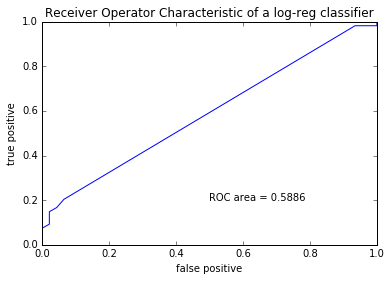

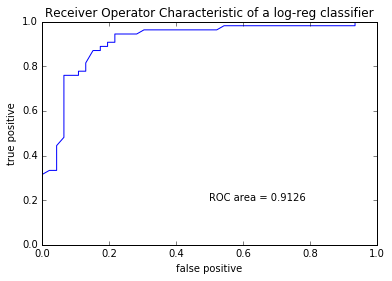

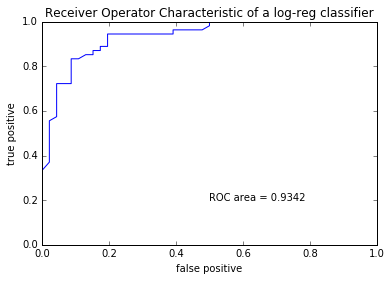

In [30]:
for i in range(3):
    maprbffalse_pos_rate, maprbftrue_pos_rate = ROC(maprbfy_predicts[i], y_test)
    plot_ROC(maprbffalse_pos_rate, maprbftrue_pos_rate)

# Task 10: Laplace approximation

## Where is saddle point approximation needed?

$$ 
\begin{align*}
\text{prior} \quad \color{blue}{p(\mathbf{\omega})} &= \mathcal{N}\left(\mathbf{\omega}|\mathbf{0},\mathbf{I}\right) \\ 
\text{likelihood} \quad \color{blue}{p(\mathcal{D}|\mathbf{\omega})} &= \prod_{n=1}^{N} y_n\sigma (\mathbf{\omega}^T \mathbf{x}) + (1-y_n)  \sigma (-\mathbf{\omega}^T \mathbf{x}) \\
\text{posterior} \quad p(\mathbf{\omega}|\mathcal{D}) &= \frac{\color{blue}{p(\mathcal{D}|\mathbf{\omega})p(\mathbf{\omega})}}{p(\mathcal{D})}\\ 
\text{predictive} \quad p(\mathbf{y^*}|\mathcal{D}, \mathbf{x^*}) &= \int \sigma (\mathbf{\omega}^T \mathbf{x^*}) \frac{\color{blue}{p(\mathcal{D}|\mathbf{\omega})p(\mathbf{\omega})}}{p(\mathcal{D})} d\mathbf{\omega}\\
\text{model evidence} \quad p(\mathcal{D}) &= \int \color{blue}{p(\mathcal{D}|\mathbf{\omega})p(\mathbf{\omega})} d\mathbf{\omega}\\ 
\end{align*}
$$

The posterior, predictive, and model evidence are difficult to compute in this case, especially when the parameter space is high dimensional. Saddle point approximation is used to approximate these distributions.